THIS CODE IS AN OLD EXPERIMENT, DONT USE THIS CODE

In [2]:
import numpy as np
import PIL.Image as Image
def make_dataset():
    inv_arr = np.array([
          [0.367322, 0.860646, -0.227968],
          [0.280085, 0.672501, 0.047413],
          [-0.01182, 0.04294, 0.968881]
        ])
    
    path = 'test2.jpeg'
    im = Image.open(path)
    height, width = im.size
    pixels = list(im.getdata())
    pixels = np.array(pixels)

    new_pixels = []
    original_pixels = []
    pixel = []
    seen = set()
    index = 0
    for i in range(len(pixels)):
        # print(original_pixels)
        pixel = pixels[i][0:3]/255.0
        pixelt = tuple(pixel)
        if pixelt not in seen:
            seen.add(pixelt)
            original_pixels.append(pixel)
            new_rgb = np.dot(inv_arr, original_pixels[index])
            for j in range(len(new_rgb)):
                if new_rgb[j] < 0:
                    new_rgb[j] = 0
                elif new_rgb[j] > 1:
                    new_rgb[j] = 1
            new_pixels.append(new_rgb)
            index += 1
    
    return new_pixels, original_pixels

In [39]:
inv_arr = np.array([[1122508.8567174524646, -1457971.8138845102955, 335462.16373308021324],
                    [-469939.31930043187626, 610382.67276321843644, -140441.60263851115842],
                    [34521.524374160328152, -44838.384495688852765, 10317.804965339063583]])
pixel = [210, 20, 8]

arr = np.array([
          [0.367322, 0.860646, -0.227968],
          [0.280085, 0.672501, 0.047413],
          [-0.01182, 0.04294, 0.968881]
        ])
inv2 = np.array([
    [ 1.83442254, -2.48858426,  0.72461281],
    [-0.63975098,  1.43302277, -0.12779461],
    [ 0.3529891, -0.08406001, 1.03311733]])
print(inv2)
new_rgb = np.dot(arr, inv2)
print(new_rgb)


[[ 1.83442254 -2.48858426  0.72461281]
 [-0.63975098  1.43302277 -0.12779461]
 [ 0.3529891  -0.08406001  1.03311733]]
[[ 0.04275442  0.33837656 -0.07933738]
 [ 0.10029734  0.26270859  0.16599437]
 [ 0.29285065  0.00950492  0.98691533]]


In [3]:
import tensorflow as tf

def make_model():
    model = tf.keras.Sequential()
    # 3 inputs, 3 hidden nodes, 3 outputs
    model.add(tf.keras.layers.Dense(3, input_dim = 3, kernel_initializer='he_uniform', activation = 'relu'))
    model.add(tf.keras.layers.Dense(64))
    model.add(tf.keras.layers.Dense(64))
    model.add(tf.keras.layers.Dense(3))
    model.compile(loss='mae', optimizer='adam')
    return model

In [4]:
model = make_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 12        
                                                                 
 dense_5 (Dense)             (None, 64)                256       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4623 (18.06 KB)
Trainable params: 4623 (18.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [334]:
import numpy as np 
from tensorflow import keras
from matplotlib import pyplot as plt
from IPython.display import clear_output

class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.loss = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        
        self.loss.append(logs['loss'])
        
        print("Epoch: ", epoch)
        print("Loss: ", self.loss)
        clear_output(wait=True)


In [329]:
def evaluate_model(model, dataset_x, dataset_y):
    results = []
    #split into train and test
    dataset_x = np.array(dataset_x)
    dataset_y = np.array(dataset_y)
    train_x = dataset_x[:int(len(dataset_x)*0.6)]
    train_y = dataset_y[:int(len(dataset_y)*0.6)]
    test_x = dataset_x[int(len(dataset_x)*0.6):]
    test_y = dataset_y[int(len(dataset_y)*0.6):]
    print(len(train_x), len(train_y), len(test_x), len(test_y))
    print("Split into train and test")
    #train model
    print("Training model")
    callbacks = [PlotLearning()]
    weights = {0: 10, 1: 5, 2: 1}
    history = model.fit(train_x, train_y, epochs=10, verbose=0, callbacks=callbacks, class_weight=weights)
    print("Model trained")
    #evaluate model
    print("Evaluating model")
    mae = model.evaluate(test_x, test_y, verbose=2)
    print('MAE: %.3f' % mae)
    results.append(mae)
    return results, model, history

In [337]:
model = make_model()
dataset_x, dataset_y = make_dataset()
results, model, history = evaluate_model(model, dataset_x, dataset_y)

Model trained
Evaluating model


2023-07-25 12:41:36.841193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2720/2720 - 9s - loss: 0.0753 - 9s/epoch - 3ms/step
MAE: 0.075


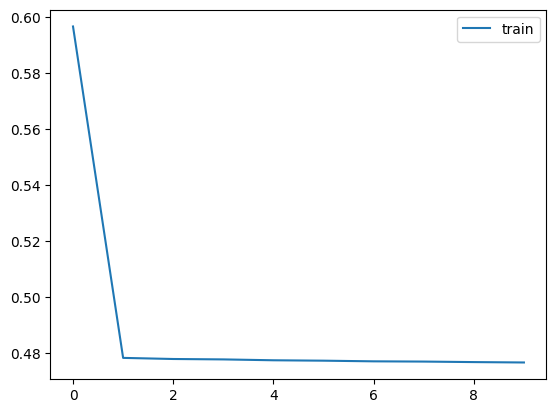

In [341]:
history_dict = history.history
# plot learning curves
plt.plot(history_dict['loss'], label='train')
plt.legend()
plt.show()


In [226]:
original_pixels, new_pixels = make_dataset()

path = 'test6_images/test6.jpeg_1_1.0.png'
path2 = 'test6_images/test6.jpeg'
im = Image.open(path)
im2 = Image.open(path2)
height, width = im.size
pixels = list(im.getdata())
pixels2 = list(im2.getdata())
pixels = np.array(pixels)
pixels2 = np.array(pixels2)

test_x = list(set(original_pixels))
test_y = list(set(new_pixels))
test_x = np.array(test_x)
print(test_x.shape)
test_y = np.array(test_y)
print(test_y.shape)
# print(model.evaluate(test_x, test_y, verbose=2))
# print(model.predict(test_x)*255)
# print(test_y * 255)

TypeError: unhashable type: 'numpy.ndarray'

In [271]:
original_pixels, new_pixels = make_dataset()

/var/folders/5t/bmhkrbcn4yzgbdrrgwk7ps_r0000gn/T/ipykernel_33568/3840544482.py:20: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if original_pixels.index(pixel) != -1:


ValueError: array([0.25882353, 0.38431373, 0.48235294]) is not in list

In [214]:
new_pixels2 = np.array(new_pixels2) * 255.0
new_pixels2 = np.ravel(new_pixels2)
new_image = Image.fromarray(new_pixels2.reshape(533, 800, 3).astype('uint8'))
new_image.save(f'remake2.png')

/var/folders/5t/bmhkrbcn4yzgbdrrgwk7ps_r0000gn/T/ipykernel_33568/2696741982.py:3: RuntimeWarning: invalid value encountered in cast
  new_image = Image.fromarray(new_pixels2.reshape(533, 800, 3).astype('uint8'))


In [144]:
print(model.predict(test_x))
print(test_y)

1/1 [==============================] - 0s 79ms/step
[[0.28122568 0.30726272 0.09104604]
 [0.25590587 0.28977937 0.07912391]]
[[0.11764706 0.37647059 0.08627451]
 [0.09803922 0.35686275 0.0745098 ]]


In [123]:
path = 'test6_images/test6.jpeg_1_1.0.png'
path2 = 'test6_images/test6.jpeg'
im = Image.open(path)
im2 = Image.open(path2)
height, width = im.size
pixels = list(im.getdata())
pixels2 = list(im2.getdata())
pixels = np.array(pixels)
pixels2 = np.array(pixels2)

new_pixels = []
for i in range(len(pixels)):
    predicted_rgb = model.predict(pixels[i:i+1]/255.0, verbose=0)
    new_pixels.append(predicted_rgb[0]*255.0)
    print(predicted_rgb[0]*255.0)
    print(pixels2[i])

new_pixels = np.array(new_pixels)
new_pixels2 = np.ravel(new_pixels)
new_image = Image.fromarray(new_pixels2.reshape(width, height, 3).astype('uint8'))
new_image.save(f'fixed.png')

2023-07-24 13:18:30.265154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[71.975266 78.408806 23.022554]
[30 96 22]
[65.070946 73.79988  20.171082]
[25 91 19]
[50.419373 64.05945  14.080008]
[15 80 16]
[34.86462  55.34529  11.450762]
[ 5 68 11]
[27.30668 55.59794 20.20458]
[ 8 65 20]
[40.60398  73.22723  45.825428]
[26 80 44]
[ 65.75455  100.26859   79.525764]
[ 55 105  80]
[ 85.58534 122.74574 108.91968]
[ 78 125 109]
[ 82.828064 124.96677  116.9894  ]
[ 83 124 116]
[ 71.23104 117.69838 113.28788]
[ 75 116 112]
[48.37344 98.68174 95.11656]
[59 94 96]
[24.679539 77.45088  72.791664]
[37 72 74]
[10.776267 65.54096  61.091988]
[28 59 61]
[ 6.2517743 60.64155   54.85779  ]
[23 54 56]
[-7.017828 48.944813 42.849144]
[12 42 42]
[-20.280773  35.55649   27.075052]
[ 0 30 23]
[-5.83958   32.28864    3.7950845]
[ 0 29  9]
[-8.152477   29.338678   -0.43764532]
[ 0 27  0]
[-12.845196   26.679218   -1.2876749]
[ 0 23  0]
[-9.629094   28.6029     -0.51680267]
[ 0 26  0]
[-3.7292795 33.237595   3.5652423]
[ 0 33  6]
[ 1.0580837 38.589134  10.411988 ]
[ 1 40 13]
[ 6.58708

KeyboardInterrupt: 